In [41]:
import pandas as pd
import numpy as np

# Function to extract features from Actigraphy data
def extract_features(data):
    required_columns = {'X', 'Y', 'Z', 'enmo'}
    if not required_columns.issubset(data.columns):
        raise ValueError(f"Missing required columns: {required_columns - set(data.columns)}")
    
    # Statistical features
    mean_x = data['X'].mean()
    mean_y = data['Y'].mean()
    mean_z = data['Z'].mean()
    std_x = data['X'].std()
    std_y = data['Y'].std()
    std_z = data['Z'].std()
    
    mean_enmo = data['enmo'].mean()
    std_enmo = data['enmo'].std()
    max_enmo = data['enmo'].max()
    min_enmo = data['enmo'].min()

    magnitude = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)
    mean_magnitude = magnitude.mean()
    std_magnitude = magnitude.std()

    activity_level = pd.cut(
        magnitude,
        bins=[0, 0.5, 1.0, 1.5, 2.0],
        labels=['Very Low', 'Low', 'Medium', 'High'],
        include_lowest=True
    ).mode()[0] if len(magnitude) > 0 else 'Unknown'

    inactivity_percentage = (data['enmo'] == 0).mean() * 100

    non_wear_percentage = (data['non-wear_flag'] == 1).mean() * 100 if 'non-wear_flag' in data.columns else None

    features = {
        'mean_x': mean_x,
        'mean_y': mean_y,
        'mean_z': mean_z,
        'std_x': std_x,
        'std_y': std_y,
        'std_z': std_z,
        'mean_enmo': mean_enmo,
        'std_enmo': std_enmo,
        'max_enmo': max_enmo,
        'min_enmo': min_enmo,
        'mean_magnitude': mean_magnitude,
        'std_magnitude': std_magnitude,
        'activity_level': activity_level,
        'inactivity_percentage': inactivity_percentage,
        'non_wear_percentage': non_wear_percentage
    }
    return pd.DataFrame([features])

# Path for the participant file 
participant_file = "/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Intermediate_Results/cleaned_series_train.parquet/id=ab16a20d.parquet"

# Loading the participant data
participant_data = pd.read_parquet(participant_file)

# Extracting features for the participant
participant_features = extract_features(participant_data)

# Checking if the features were extracted successfully
if participant_features is not None and not participant_features.empty:
    # Dynamically creating the output file path
    participant_id = participant_file.split('id=')[-1].split('.')[0]
   
    # Saved extracted features to a parquet file
    print(f"Features extracted and saved successfully for participant {participant_id}.")
    print(participant_features)  
else:
    print("No valid features extracted.")

Features extracted and saved successfully for participant ab16a20d.
     mean_x    mean_y   mean_z  std_x  std_y  std_z  mean_enmo  std_enmo  \
0 -0.737998 -0.466262  0.40423    NaN    NaN    NaN        0.0       NaN   

   max_enmo  min_enmo  mean_magnitude  std_magnitude activity_level  \
0       0.0       0.0           0.962            NaN            Low   

   inactivity_percentage  non_wear_percentage  
0                  100.0                  0.0  


In [43]:
import pandas as pd

# Loading the parquet file
series_train = pd.read_parquet('/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Dataset/child-mind-institute-problematic-internet-use/series_train.parquet/id=ab16a20d/part-0.parquet')

# Basic information about the train parquet file
print("Series Train Info:")
print(series_train.info())

# Displaying the first 5 rows of the train parquet file
print("\nFirst 5 rows of series_train:")
print(series_train.head())

# Printing the number of rows and columns in the train parquet file
print("\nNumber of rows and columns in series_train:")
print(series_train.shape)

# Basic statistics of the numeric columns in the train parquet file
print("\nSeries Train Summary Statistics:")
print(series_train.describe())

# Checking for missing values in the train parquet file
print("\nMissing Values in series_train:")
print(series_train.isnull().sum())

Series Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389028 entries, 0 to 389027
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   step                 389028 non-null  uint32 
 1   X                    389028 non-null  float32
 2   Y                    389028 non-null  float32
 3   Z                    389028 non-null  float32
 4   enmo                 389028 non-null  float32
 5   anglez               389028 non-null  float32
 6   non-wear_flag        389028 non-null  float32
 7   light                389028 non-null  float32
 8   battery_voltage      389028 non-null  float32
 9   time_of_day          389028 non-null  int64  
 10  weekday              389028 non-null  int8   
 11  quarter              389028 non-null  int8   
 12  relative_date_PCIAT  389028 non-null  float32
dtypes: float32(9), int64(1), int8(2), uint32(1)
memory usage: 18.6 MB
None

First 5 rows of series_train

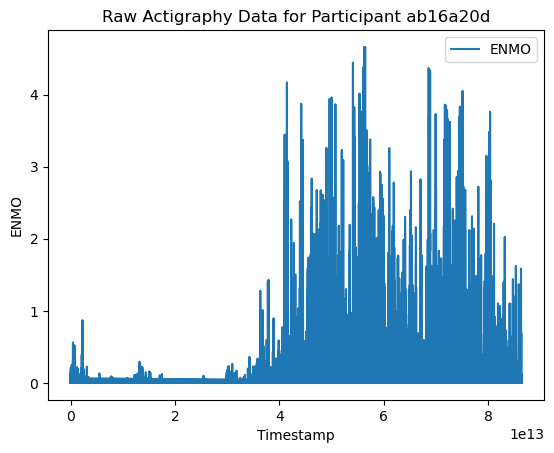

In [45]:
import matplotlib.pyplot as plt

# Example plot for participant's raw data
raw_data = series_train
plt.plot(raw_data['time_of_day'], raw_data['enmo'], label="ENMO")
plt.xlabel("Timestamp")
plt.ylabel("ENMO")
plt.title("Raw Actigraphy Data for Participant ab16a20d")
plt.legend()
plt.show()

In [47]:
print(raw_data[['time_of_day', 'enmo']].describe())

        time_of_day           enmo
count  3.890280e+05  389028.000000
mean   4.347449e+13       0.020165
std    2.507429e+13       0.107170
min    0.000000e+00       0.000000
25%    2.167500e+13       0.000000
50%    4.378000e+13       0.000009
75%    6.525500e+13       0.001691
max    8.639500e+13       4.661676


In [49]:
extracted_mean = raw_data['enmo'].mean()
extracted_std = raw_data['enmo'].std()
print(f"Extracted Mean: {extracted_mean}, Extracted Std Dev: {extracted_std}")

Extracted Mean: 0.02016543783247471, Extracted Std Dev: 0.1071702316403389


In [51]:
series_train['battery_voltage'].describe()

count    389028.000000
mean       3833.726807
std         161.771805
min        3098.166748
25%        3736.000000
50%        3800.000000
75%        3951.416748
max        4175.000000
Name: battery_voltage, dtype: float64

In [59]:
# Checking time differences for these files
series_train['time_diff'] = (series_train['time_of_day'].diff() * 86400).round(0)  # Convert to seconds
print(series_train['time_diff'].describe())
print(series_train['time_diff'].value_counts())  # See distribution of intervals

count    3.890270e+05
mean    -9.341213e+12
std      5.739701e+16
min     -7.464528e+18
25%      4.320000e+14
50%      4.320000e+14
75%      4.320000e+14
max      8.640000e+14
Name: time_diff, dtype: float64
time_diff
 4.320000e+14    389003
-7.464528e+18        23
 8.640000e+14         1
Name: count, dtype: int64


In [71]:
import os
import pandas as pd

TRAIN_DIR = '/Users/nandana_hemanth/Documents/Semester II/DATA 245/Project/Dataset/child-mind-institute-problematic-internet-use/series_train.parquet'
battery_threshold = 3785.08  # mV
expected_interval = 5  # seconds

# Check the problematic files
problematic_files = ['id=ab16a20d', 'id=db38d1f9']  

for folder in problematic_files:
    participant_path = os.path.join(TRAIN_DIR, folder)
    file_path = os.path.join(participant_path, 'part-0.parquet')
    series_data = pd.read_parquet(file_path)
    
    print(f"\nProcessing participant: {folder}")
    print(f"Initial size of data: {series_data.shape}")
    
    # Step 1: Filtering by Battery Voltage
    filtered_data = series_data[series_data['battery_voltage'] >= battery_threshold]
    print(f"After battery voltage filter: {filtered_data.shape}")
    
    # Step 2: Adding time columns if not present
    if 'day_time' not in filtered_data.columns:
        filtered_data['time_of_day_hours'] = filtered_data['time_of_day'] / 1e9 / 3600
        filtered_data['day_time'] = filtered_data['relative_date_PCIAT'] + (filtered_data['time_of_day_hours'] / 24)
    print(f"After adding time columns: {filtered_data.shape}")
    
    # Step 3: Calculating Time Differences
    filtered_data['time_diff'] = (filtered_data['day_time'].diff() * 86400).round(0)  # Convert to seconds
    print(f"Time differences stats:\n{filtered_data['time_diff'].describe()}")
    
    # Step 4: Identifying Consistent Sessions
    filtered_data['session_id'] = (filtered_data['time_diff'] > expected_interval).cumsum()
    consistent_data = pd.DataFrame()
    for session_id, session_data in filtered_data.groupby('session_id'):
        if (session_data['time_diff'].dropna() == expected_interval).all():
            consistent_data = pd.concat([consistent_data, session_data])
    print(f"After consistency filter: {consistent_data.shape}")
    
    # Step 5: Final Data
    print(f"Final cleaned data shape for {folder}: {consistent_data.shape}")


Processing participant: id=ab16a20d
Initial size of data: (389028, 13)
After battery voltage filter: (215917, 13)
After adding time columns: (215917, 15)
Time differences stats:
count    215916.000000
mean          5.039738
std           7.433924
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max        2620.000000
Name: time_diff, dtype: float64
After consistency filter: (1, 17)
Final cleaned data shape for id=ab16a20d: (1, 17)

Processing participant: id=db38d1f9
Initial size of data: (95841, 13)
After battery voltage filter: (95641, 13)
After adding time columns: (95641, 15)
Time differences stats:
count     95640.000000
mean         44.705144
std        1976.508865
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max      207745.000000
Name: time_diff, dtype: float64
After consistency filter: (1, 17)
Final cleaned data shape for id=db38d1f9: (1, 17)


/var/folders/6v/9mkv95jn25l89ghlxfz2_jww0000gn/T/ipykernel_89352/3902067763.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time_of_day_hours'] = filtered_data['time_of_day'] / 1e9 / 3600
/var/folders/6v/9mkv95jn25l89ghlxfz2_jww0000gn/T/ipykernel_89352/3902067763.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['day_time'] = filtered_data['relative_date_PCIAT'] + (filtered_data['time_of_day_hours'] / 24)
/var/folders/6v/9mkv95jn25l89ghlxfz2_jww0000gn/T/ipykernel_89352/3